In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('data_allclean.csv')
print(data.columns)

Index(['speed_limit', 'urban_or_rural_area', 'traffic_flow', 'accident_rate',
       'housing_density', 'mean_income_of_tax_payers', 'Road_Network_Density',
       'Signal_Count', 'Driving_Distance'],
      dtype='object')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22064 entries, 0 to 22063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   speed_limit                22064 non-null  int64  
 1   urban_or_rural_area        22064 non-null  int64  
 2   traffic_flow               22064 non-null  int64  
 3   accident_rate              22064 non-null  float64
 4   housing_density            22064 non-null  float64
 5   mean_income_of_tax_payers  22064 non-null  int64  
 6   Road_Network_Density       22064 non-null  float64
 7   Signal_Count               22064 non-null  int64  
 8   Driving_Distance           22064 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.5 MB


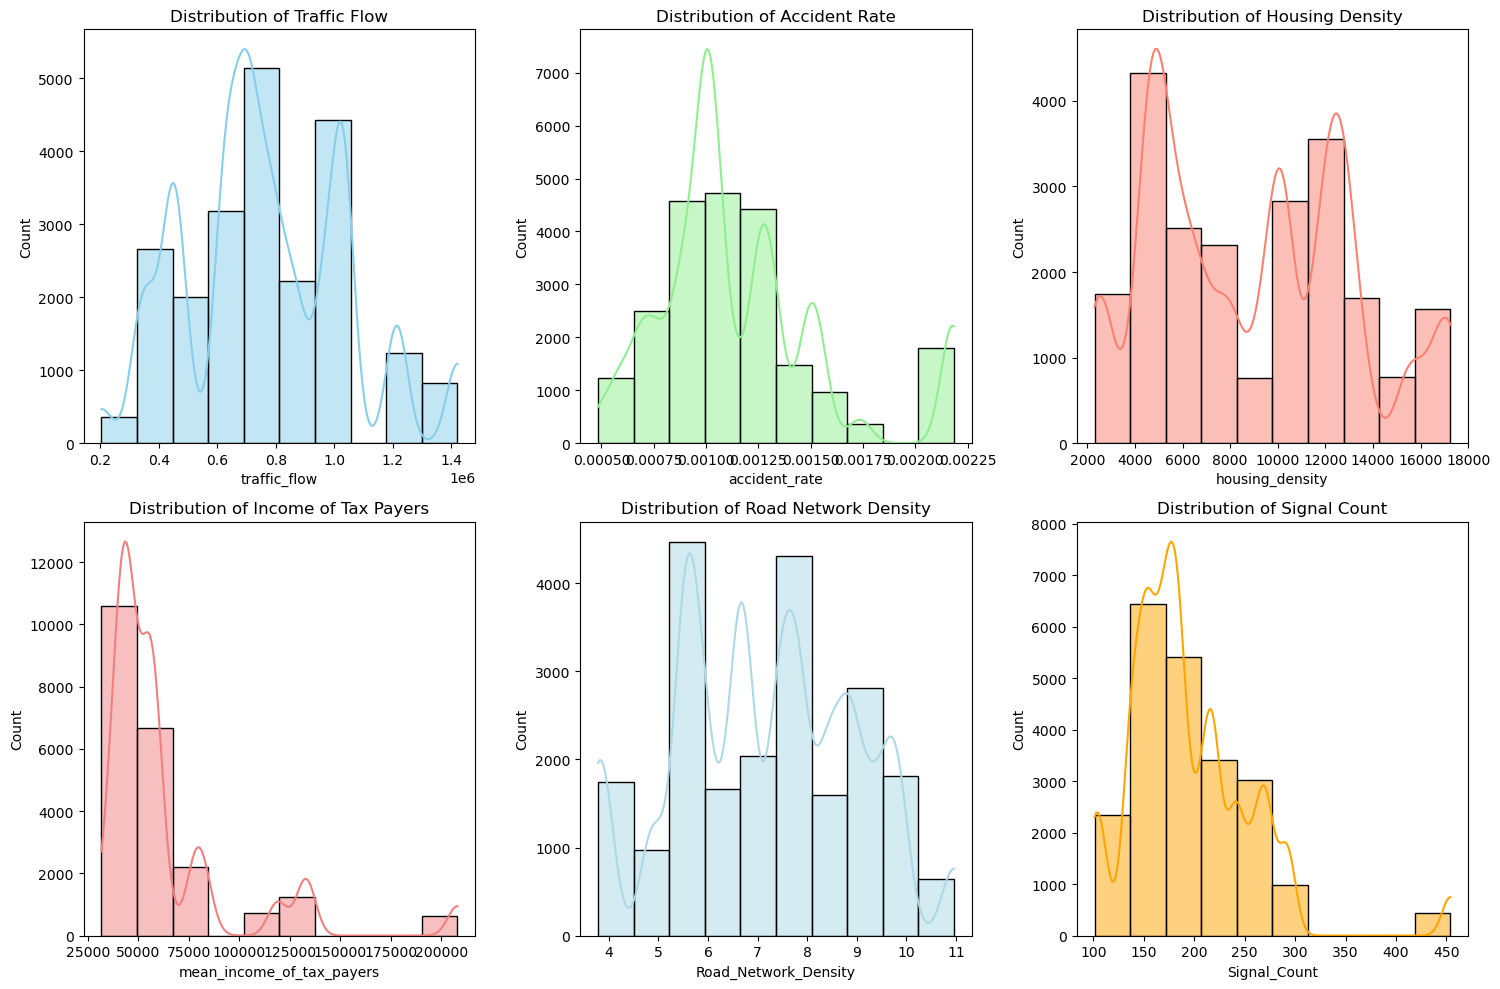

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设数据已经加载在data中
# 绘制多个变量的分布图

plt.figure(figsize=(15, 10))

# 绘制 `traffic_flow` 的分布图
plt.subplot(2, 3, 1)
sns.histplot(data['traffic_flow'], kde=True, bins=10,color='skyblue')
plt.title('Distribution of Traffic Flow')

# 绘制 `accident_rate` 的分布图
plt.subplot(2, 3, 2)
sns.histplot(data['accident_rate'], kde=True,bins=10, color='lightgreen')
plt.title('Distribution of Accident Rate')

# 绘制 `housing_density` 的分布图
plt.subplot(2, 3, 3)
sns.histplot(data['housing_density'], kde=True,bins=10, color='salmon')
plt.title('Distribution of Housing Density')

# 绘制 `mean_income_of_tax_payers` 的分布图
plt.subplot(2, 3, 4)
sns.histplot(data['mean_income_of_tax_payers'], kde=True,bins=10, color='lightcoral')
plt.title('Distribution of Income of Tax Payers')

# 绘制 `Road_Network_Density` 的分布图
plt.subplot(2, 3, 5)
sns.histplot(data['Road_Network_Density'], kde=True,bins=10, color='lightblue')
plt.title('Distribution of Road Network Density')

# 绘制 `Signal_Count` 的分布图
plt.subplot(2, 3, 6)
sns.histplot(data['Signal_Count'], kde=True,bins=10, color='orange')
plt.title('Distribution of Signal Count')

# 调整布局
plt.tight_layout()
plt.show()

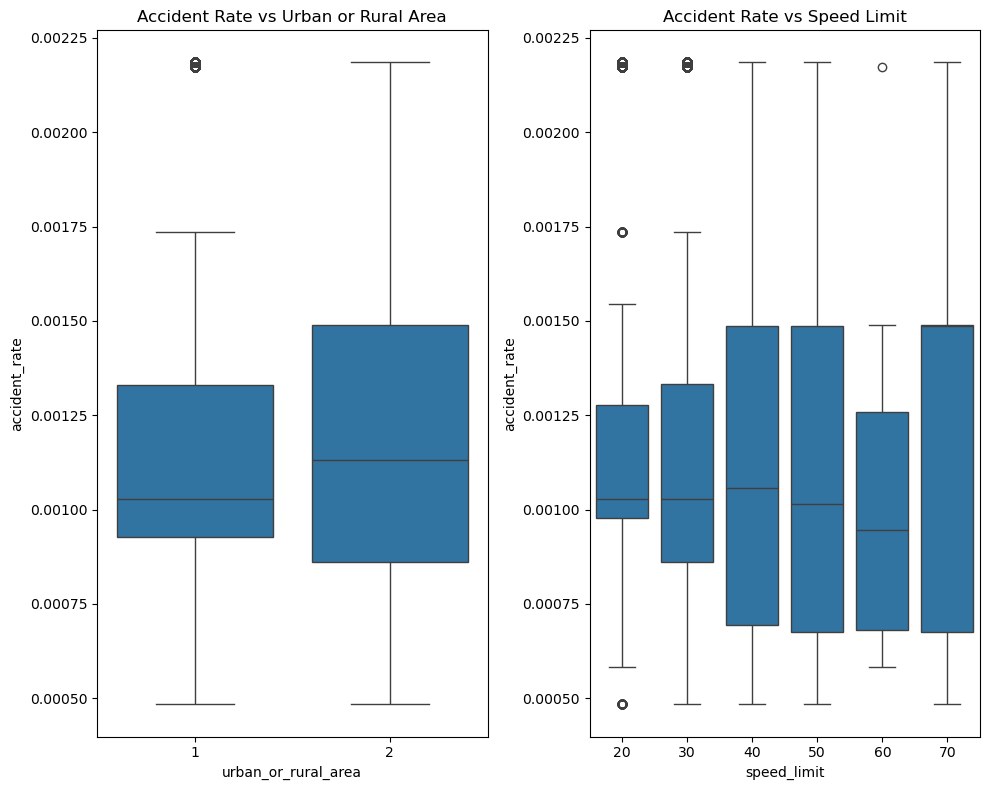

In [4]:
# 设置图形大小
plt.figure(figsize=(10, 8))

# 1. 合并箱型图
plt.subplot(1, 2, 1)  # 一行两列，选择第一个位置
# 绘制 `urban_or_rural_area` 与 `accident_rate` 的箱型图
sns.boxplot(x='urban_or_rural_area', y='accident_rate', data=data)
plt.title("Accident Rate vs Urban or Rural Area")

plt.subplot(1, 2, 2)  # 一行两列，选择第二个位置
# 绘制 `speed_limit` 与 `accident_rate` 的箱型图
sns.boxplot(x='speed_limit', y='accident_rate', data=data)
plt.title("Accident Rate vs Speed Limit")

# 显示箱型图
plt.tight_layout()
plt.show()

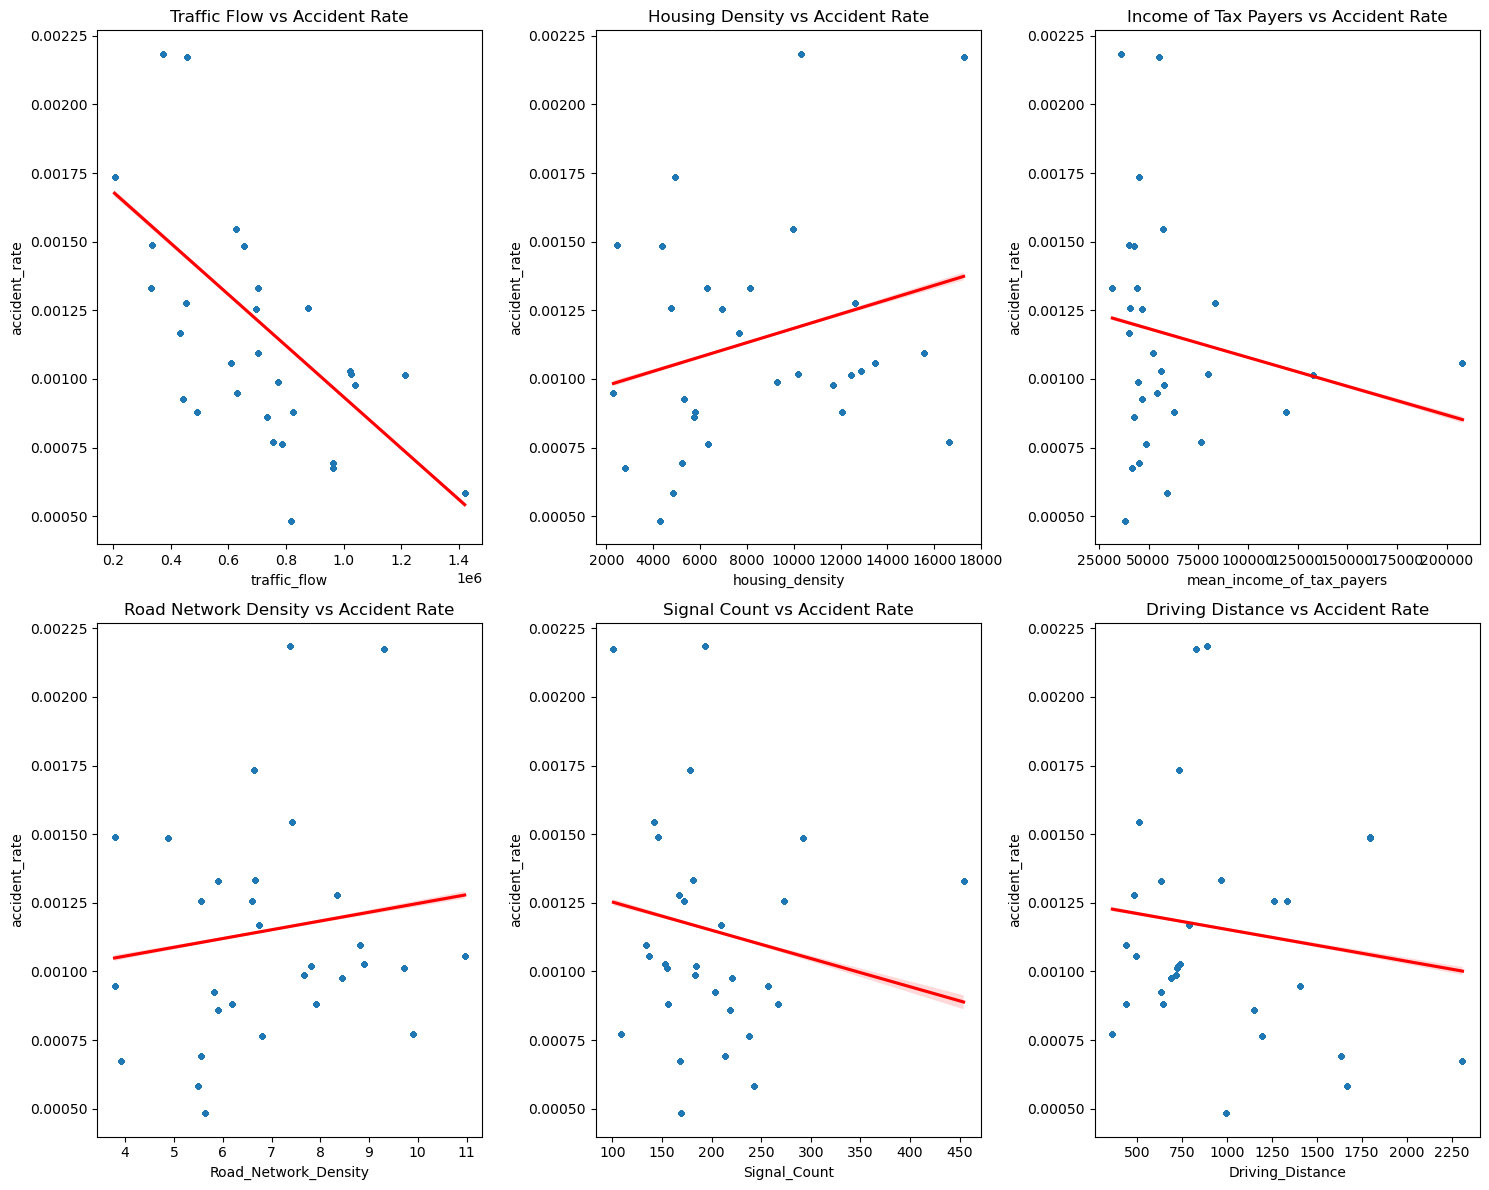

In [5]:
# 2. 合并散点图与拟合线图
plt.figure(figsize=(15, 12))

# 绘制 `traffic_flow` 与 `accident_rate` 的散点图并拟合线
plt.subplot(2, 3, 1)  # 两行三列，选择第一个位置
sns.regplot(x='traffic_flow', y='accident_rate', data=data, scatter_kws={'s':10}, line_kws={'color': 'red'})
plt.title("Traffic Flow vs Accident Rate")

# 绘制 `housing_density` 与 `accident_rate` 的散点图并拟合线
plt.subplot(2, 3, 2)  # 两行三列，选择第二个位置
sns.regplot(x='housing_density', y='accident_rate', data=data, scatter_kws={'s':10}, line_kws={'color': 'red'})
plt.title("Housing Density vs Accident Rate")

# 绘制 `mean_income_of_tax_payers` 与 `accident_rate` 的散点图并拟合线
plt.subplot(2, 3, 3)  # 两行三列，选择第三个位置
sns.regplot(x='mean_income_of_tax_payers', y='accident_rate', data=data, scatter_kws={'s':10}, line_kws={'color': 'red'})
plt.title("Income of Tax Payers vs Accident Rate")

# 绘制 `Road_Network_Density` 与 `accident_rate` 的散点图并拟合线
plt.subplot(2, 3, 4)  # 两行三列，选择第四个位置
sns.regplot(x='Road_Network_Density', y='accident_rate', data=data, scatter_kws={'s':10}, line_kws={'color': 'red'})
plt.title("Road Network Density vs Accident Rate")

# 绘制 `Signal_Count` 与 `accident_rate` 的散点图并拟合线
plt.subplot(2, 3, 5)  # 两行三列，选择第五个位置
sns.regplot(x='Signal_Count', y='accident_rate', data=data, scatter_kws={'s':10}, line_kws={'color': 'red'})
plt.title("Signal Count vs Accident Rate")

# 绘制 `Driving_Distance` 与 `accident_rate` 的散点图并拟合线
plt.subplot(2, 3, 6)  # 两行三列，选择第六个位置
sns.regplot(x='Driving_Distance', y='accident_rate', data=data, scatter_kws={'s':10}, line_kws={'color': 'red'})
plt.title("Driving Distance vs Accident Rate")

# 显示散点图与拟合线图
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Log of Signal Count vs Log of Accident Rate')

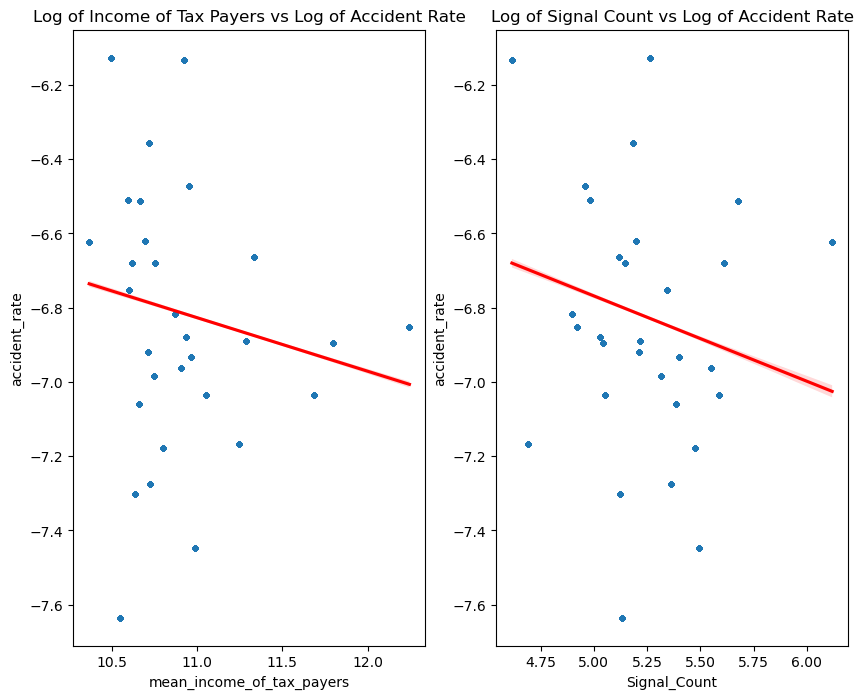

In [6]:
plt.figure(figsize=(10, 8))

# 绘制 `mean_income_of_tax_payers` 与 `accident_rate` 的散点图并拟合线
plt.subplot(1, 2, 1)  # 两行三列，选择第三个位置
sns.regplot(x=np.log(data['mean_income_of_tax_payers']), 
            y=np.log(data['accident_rate']), 
            scatter_kws={'s':10}, 
            line_kws={'color': 'red'})
plt.title("Log of Income of Tax Payers vs Log of Accident Rate")

# 绘制 `Signal_Count` 与 `accident_rate` 的散点图并拟合线
plt.subplot(1,2,2)  # 两行三列，选择第五个位置
sns.regplot(x=np.log(data['Signal_Count']), y=np.log(data['accident_rate']), 
            scatter_kws={'s':10}, line_kws={'color': 'red'})
plt.title("Log of Signal Count vs Log of Accident Rate")

In [7]:
# 使用 pd.get_dummies 进行独热编码
data = pd.get_dummies(data, columns=['speed_limit'], drop_first=True)

In [8]:
# 使用 pandas 的 get_dummies() 来进行独热编码
data = pd.get_dummies(data, columns=['urban_or_rural_area'], drop_first=True)

# 查看新的数据框，看看 'urban_or_rural_area' 已经被替换成 'urban_or_rural_area_Urban' 或 'urban_or_rural_area_Rural'
print(data.head())

   traffic_flow  accident_rate  housing_density  mean_income_of_tax_payers  \
0        492018       0.000880           5802.0                      63000   
1        655596       0.001486           4365.6                      42800   
2        962823       0.000675           2810.5                      41600   
3       1421345       0.000583           4821.9                      59100   
4       1024397       0.001018          10164.3                      79700   

   Road_Network_Density  Signal_Count  Driving_Distance  speed_limit_30  \
0              6.195349           156               644           False   
1              4.880493           292              1794            True   
2              3.910943           168              2311            True   
3              5.486005           243              1666            True   
4              7.801191           184               728            True   

   speed_limit_40  speed_limit_50  speed_limit_60  speed_limit_70  \
0          

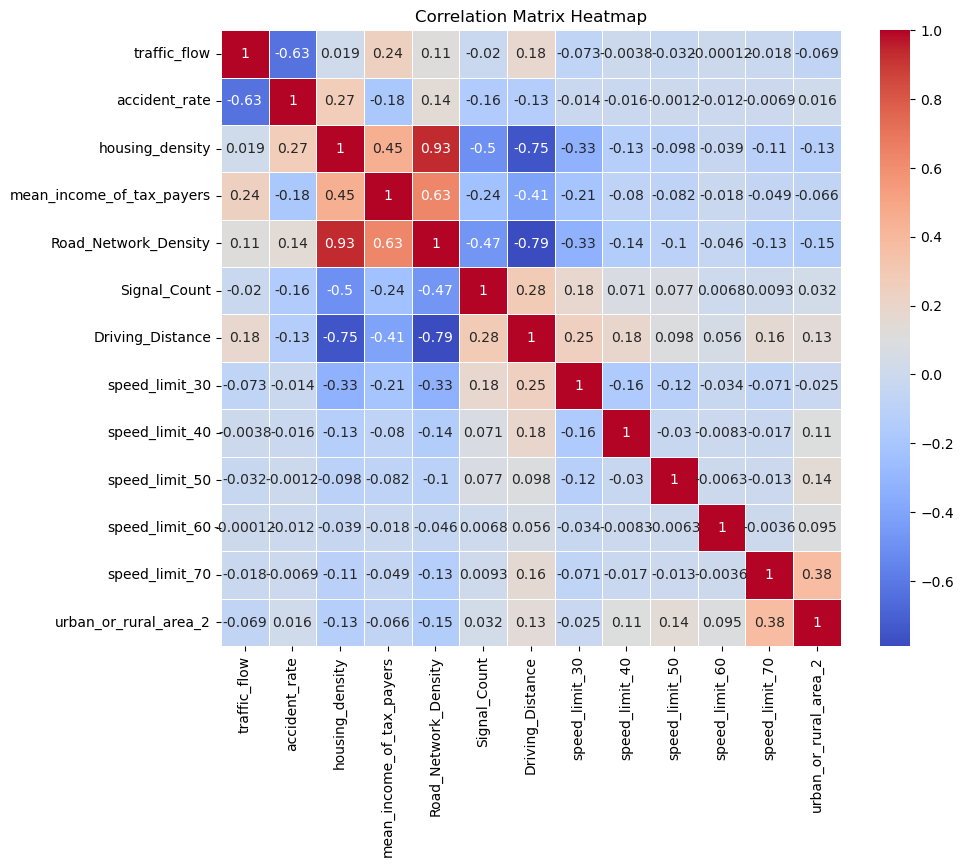

In [9]:
import seaborn as sns
correlation_matrix = data.corr()
# 绘制相关性矩阵的热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22064 entries, 0 to 22063
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   traffic_flow               22064 non-null  int64  
 1   accident_rate              22064 non-null  float64
 2   housing_density            22064 non-null  float64
 3   mean_income_of_tax_payers  22064 non-null  int64  
 4   Road_Network_Density       22064 non-null  float64
 5   Signal_Count               22064 non-null  int64  
 6   Driving_Distance           22064 non-null  int64  
 7   speed_limit_30             22064 non-null  bool   
 8   speed_limit_40             22064 non-null  bool   
 9   speed_limit_50             22064 non-null  bool   
 10  speed_limit_60             22064 non-null  bool   
 11  speed_limit_70             22064 non-null  bool   
 12  urban_or_rural_area_2      22064 non-null  bool   
dtypes: bool(6), float64(3), int64(4)
memory usage:

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 假设你的数据框名为data

# Step 1: 确保布尔型数据转换为数值型
data_encoded = data.copy()
bool_columns = data_encoded.select_dtypes(include='bool').columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Step 2: 移除因变量 accident_rate
X = data_encoded.drop(columns=['accident_rate'])

# Step 3: 添加常数列（截距项）来进行VIF计算
X = sm.add_constant(X)

# Step 4: 计算每个变量的VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 打印VIF结果
print(vif_data)

                     Variable         VIF
0                       const  193.738378
1                traffic_flow    1.384082
2             housing_density   11.357024
3   mean_income_of_tax_payers    2.346490
4        Road_Network_Density   18.948218
5                Signal_Count    1.401331
6            Driving_Distance    3.692565
7              speed_limit_30    1.271040
8              speed_limit_40    1.130409
9              speed_limit_50    1.089290
10             speed_limit_60    1.020040
11             speed_limit_70    1.233174
12      urban_or_rural_area_2    1.244509


In [12]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 将布尔值列转换为整数类型 (True -> 1, False -> 0)
data['speed_limit_30'] = data['speed_limit_30'].astype(int)
data['speed_limit_40'] = data['speed_limit_40'].astype(int)
data['speed_limit_50'] = data['speed_limit_50'].astype(int)
data['speed_limit_60'] = data['speed_limit_60'].astype(int)
data['speed_limit_70'] = data['speed_limit_70'].astype(int)
data['urban_or_rural_area_2'] = data['urban_or_rural_area_2'].astype(int)

# Step 1: 准备数据
# 目标变量
y = data['accident_rate']
# 自变量，包含所有变量
X_all = data.drop(columns=['accident_rate'])

# 添加常数项
X_all = sm.add_constant(X_all)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Step 2: 构建并拟合包含所有变量的模型
model_all = sm.OLS(y_train, X_train).fit()

# Step 3: 去除 `housing_density`，构建模型
X_no_housing_density = X_all.drop(columns=['housing_density'])
X_train_no_housing_density, X_test_no_housing_density = train_test_split(X_no_housing_density, test_size=0.2, random_state=42)

model_no_housing_density = sm.OLS(y_train, X_train_no_housing_density).fit()

# Step 4: 去除 `Road_Network_Density`，构建模型
X_no_road_network_density = X_all.drop(columns=['Road_Network_Density'])
X_train_no_road_network_density, X_test_no_road_network_density = train_test_split(X_no_road_network_density, test_size=0.2, random_state=42)

model_no_road_network_density = sm.OLS(y_train, X_train_no_road_network_density).fit()

# Step 5: 比较模型的 R²
print("R² for model with all variables:", model_all.rsquared)
print("R² for model without housing_density:", model_no_housing_density.rsquared)
print("R² for model without Road_Network_Density:", model_no_road_network_density.rsquared)

R² for model with all variables: 0.5970110021196162
R² for model without housing_density: 0.5865190774569975
R² for model without Road_Network_Density: 0.5825279176310307


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22064 entries, 0 to 22063
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   traffic_flow               22064 non-null  int64  
 1   accident_rate              22064 non-null  float64
 2   housing_density            22064 non-null  float64
 3   mean_income_of_tax_payers  22064 non-null  int64  
 4   Road_Network_Density       22064 non-null  float64
 5   Signal_Count               22064 non-null  int64  
 6   Driving_Distance           22064 non-null  int64  
 7   speed_limit_30             22064 non-null  int64  
 8   speed_limit_40             22064 non-null  int64  
 9   speed_limit_50             22064 non-null  int64  
 10  speed_limit_60             22064 non-null  int64  
 11  speed_limit_70             22064 non-null  int64  
 12  urban_or_rural_area_2      22064 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.2 MB


Best alpha from LassoCV: 2.562650640289618e-07
Mean Squared Error (MSE): 6.605745454169149e-08
R² score: 0.5936751079883749


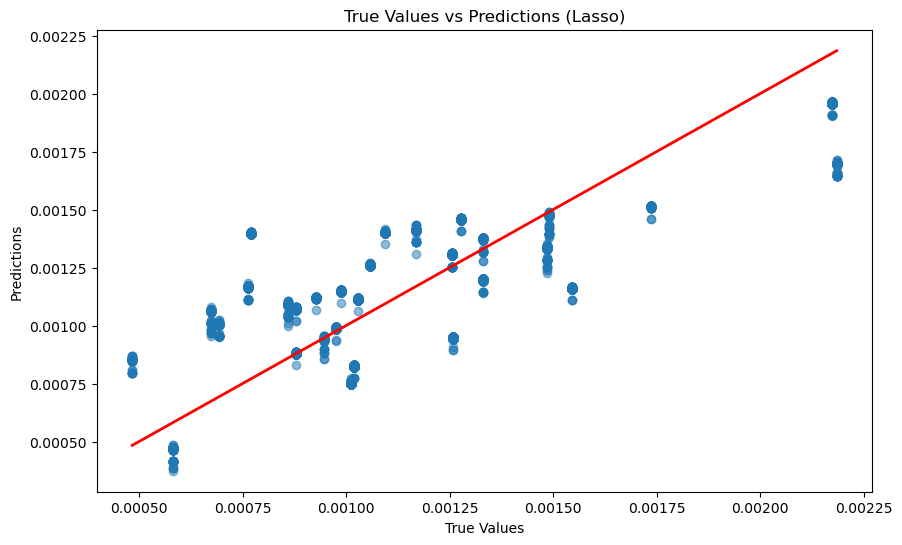

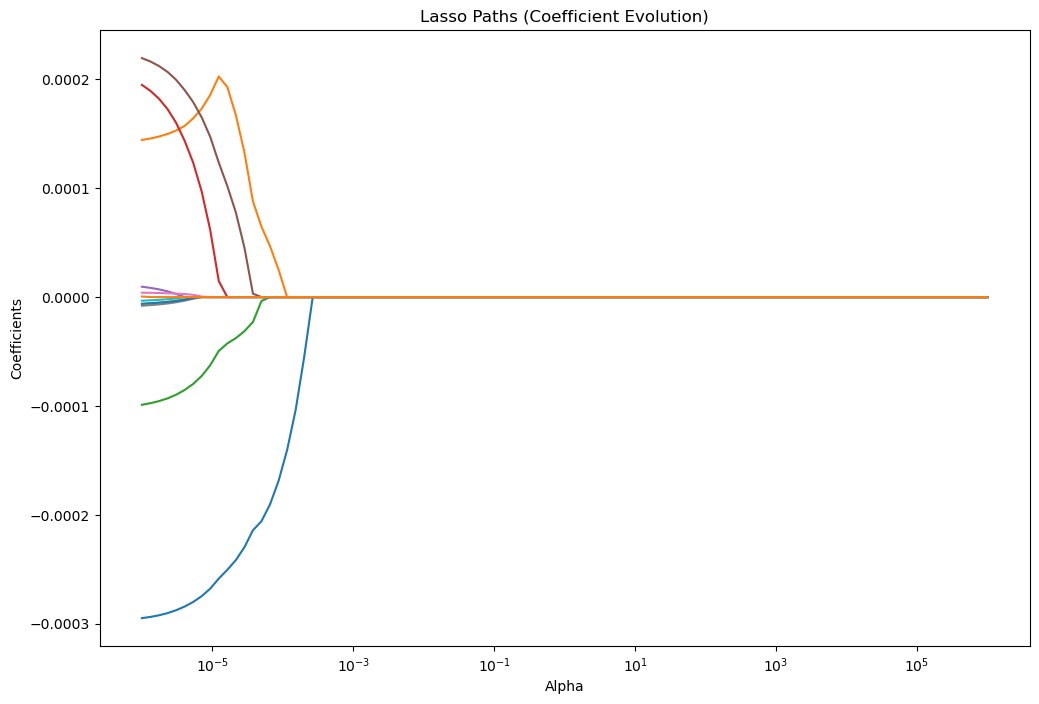

<Figure size 1000x600 with 0 Axes>

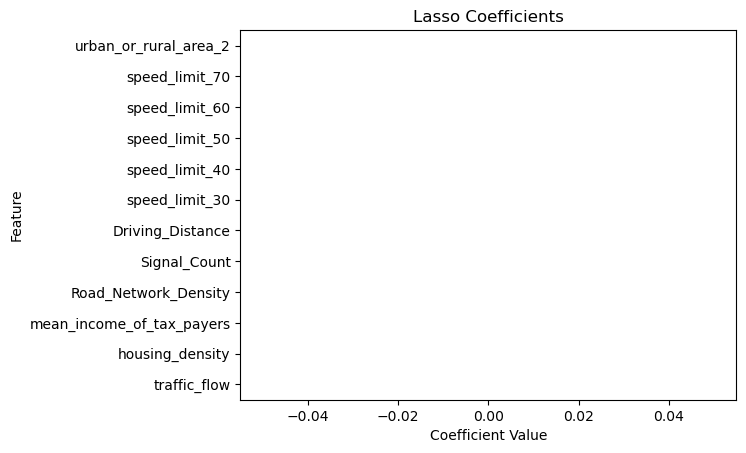

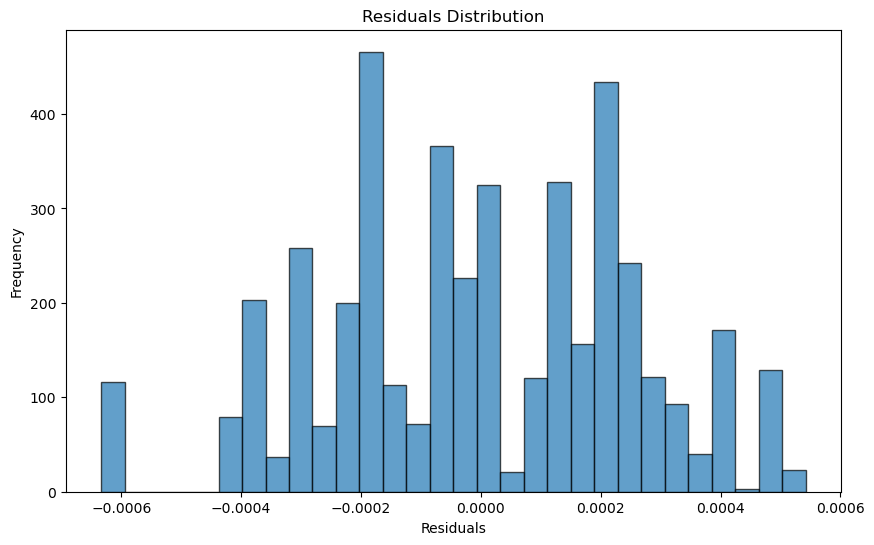

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

# 假设 df 是你的DataFrame，accident_rate 是目标变量
X = data.drop(columns=['accident_rate'])  # 特征
y = data['accident_rate']  # 目标变量

# 步骤 1: 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 步骤 2: 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 步骤 3: Lasso回归模型（使用LassoCV来选择最佳alpha）
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# 获取最佳alpha值
best_alpha = lasso_cv.alpha_
print(f"Best alpha from LassoCV: {best_alpha}")

# 使用最佳alpha进行Lasso回归
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

# 步骤 4: 预测和评估
y_pred = lasso.predict(X_test)

# 计算模型的均方误差（MSE）
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 计算R²分数
r2_score = lasso.score(X_test, y_test)
print(f"R² score: {r2_score}")

# 步骤 5: 可视化结果

# 1. 绘制真实值与预测值的散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 45度线
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions (Lasso)')
plt.show()

# 2. 绘制Lasso回归路径：不同alpha下的系数变化
alphas_lasso = np.logspace(-6, 6, 100)
coefs = []

for alpha in alphas_lasso:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# 绘制Lasso回归路径
plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.plot(alphas_lasso, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Paths (Coefficient Evolution)')
plt.axis('tight')
plt.show()

# 3. 可视化Lasso回归的系数
lasso_coefficients = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
plt.figure(figsize=(10, 6))
lasso_coefficients.plot(kind='barh', legend=False)
plt.title('Lasso Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# 4. 可视化残差分布（查看是否解决非正态问题）
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [15]:
import statsmodels.api as sm
import pandas as pd

# 假设 data 是你的数据框，accident_rate 是因变量，其他是自变量
X = data.drop(columns=['accident_rate', 'housing_density'])  # 去掉 housing_density 特征
y = data['accident_rate']  # 因变量

# 添加常数项（截距）
X = sm.add_constant(X)

# 拟合回归模型
model_no_housing_density = sm.OLS(y, X).fit()

# 查看回归结果，包括 p-value
print(model_no_housing_density.summary())

                            OLS Regression Results                            
Dep. Variable:          accident_rate   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     2828.
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:19:36   Log-Likelihood:             1.5074e+05
No. Observations:               22064   AIC:                        -3.015e+05
Df Residuals:                   22052   BIC:                        -3.014e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 